<a href="https://colab.research.google.com/github/hnidey13/tesis_SVD_t-SVDM/blob/main/SVD_escala_grises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limpiamos área de trabajo

In [42]:
rm(list=ls())

Leemos imagen y graficamos

In [43]:
if (!require("imager")) install.packages("imager")

[1] 256 256   1   1

[1] 256 256   1   1

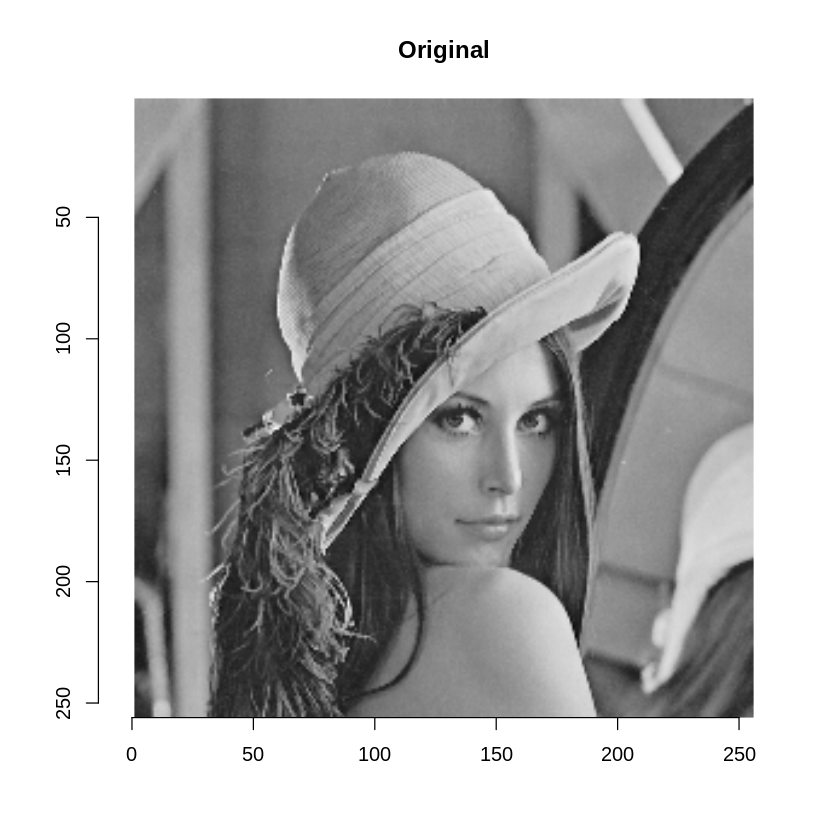

In [44]:
library(imager)
image <- grayscale(load.image("imagen2.png")) #Cargar imagen previamente de "tesis_SVD_t-SVDM/datos"
(dim <- dim(image))
(cutdim <- c(256,256,1,1))
cutimage <- as.cimg(array(image[1:cutdim[1],1:cutdim[2],,],cutdim))
plot(cutimage, main = "Original")

Convertimos a matriz

In [45]:
image_mat <- scale(cutimage[,,1,1], center = TRUE, scale = FALSE)
str(image_mat)

 num [1:256, 1:256] 0.0973 0.0973 0.0816 0.0973 0.0973 ...
 - attr(*, "scaled:center")= num [1:256] 0.534 0.535 0.529 0.525 0.522 ...


Verificamos que es posible graficar de la matriz

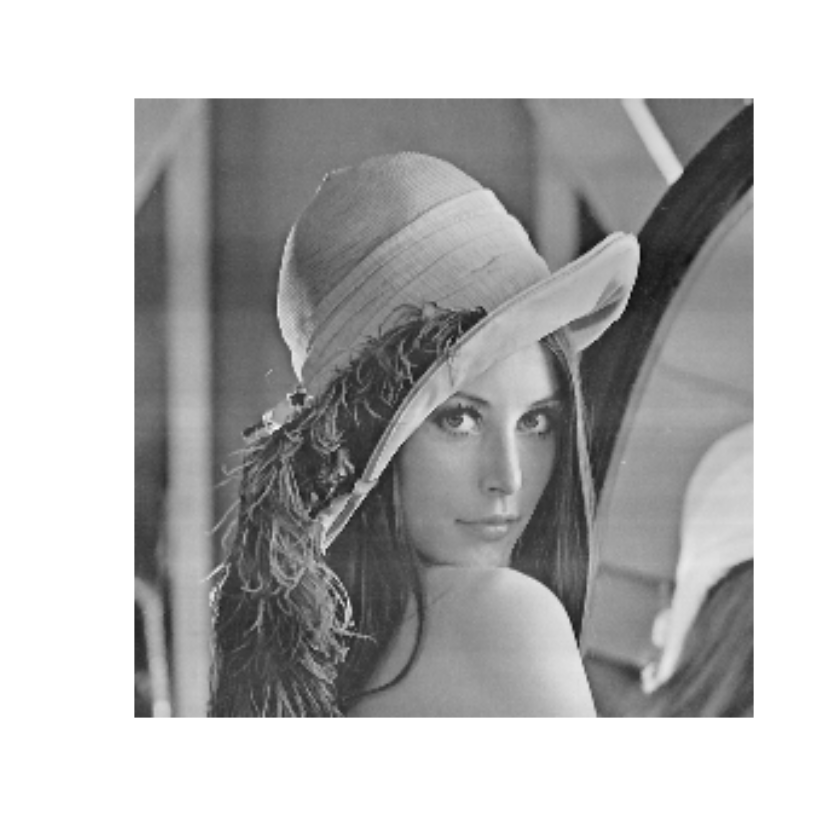

In [46]:
image2 <- array(image_mat,cutdim)
plot(as.cimg(image2), axes = FALSE)

SVD

In [47]:
library(Matrix)
thinSVD <- svd(image_mat)

Sumas parciales hasta $k$

[1] 255
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 5.684342e-14

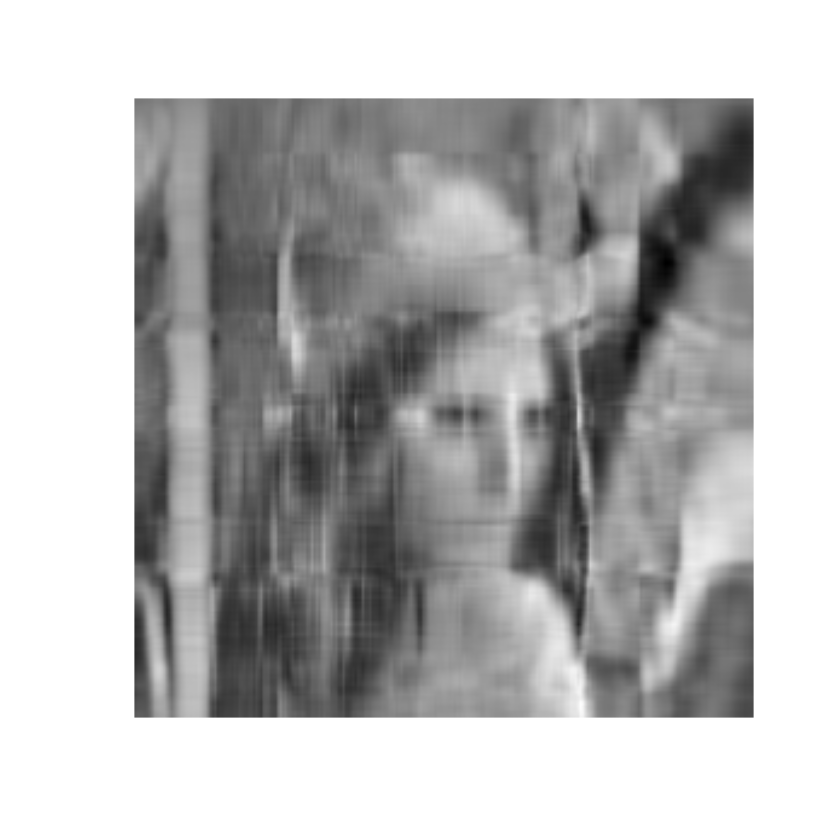

In [48]:
rankMatrix(image_mat)
k <- 10
MatRan1 <- function(i) (thinSVD$d[i] * thinSVD$u[,i] %*% t(thinSVD$v[,i]))
listMatRan1 <- lapply(1:k, MatRan1)
imageRank <- Reduce("+", listMatRan1)
plot(as.cimg(array(imageRank,cutdim)), axes = FALSE)

PCA y SVD (es necesario centrar $A$)

In [49]:
PCA <- princomp(image_mat, cor = FALSE)

Vectores propios

In [50]:
head(loadings(PCA)[,1])
head(thinSVD$v[,1])

[1] 0.005160095 0.005344121 0.004851051 0.003563317 0.002717875 0.001775849

[1] -0.005160095 -0.005344121 -0.004851051 -0.003563317 -0.002717875
[6] -0.001775849

Valores propios

In [51]:
head(eigen(t(image_mat)%*%image_mat)$values)
head(thinSVD$d^2)

[1] 651.9097 388.7373 246.3631 158.1751 132.6120  82.8804

[1] 651.9097 388.7373 246.3631 158.1751 132.6120  82.8804